In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
df=pd.read_csv("TSLA.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-16,13.739333,14.332000,13.720000,14.287333,14.287333,43881000
1,2015-11-17,14.346667,14.400000,14.093333,14.266667,14.266667,32230500
2,2015-11-18,14.300000,14.758667,14.168000,14.738000,14.738000,42178500
3,2015-11-19,14.702667,15.079333,14.686667,14.786667,14.786667,37566000
4,2015-11-20,14.899333,15.000000,14.238667,14.667333,14.667333,66010500
5,2015-11-23,14.490000,14.612000,14.312000,14.516667,14.516667,37893000
6,2015-11-24,14.358000,14.733333,14.333333,14.550000,14.550000,37204500
7,2015-11-25,14.756000,15.388667,14.692000,15.309333,15.309333,59862000
8,2015-11-27,15.404000,15.483333,15.134000,15.440667,15.440667,29241000
9,2015-11-30,15.452667,15.618667,15.272000,15.350667,15.350667,39897000


In [2]:
training = df.iloc[:800, 1:2].values
testing = df.iloc[800:, 1:2].values

In [4]:
sc = MinMaxScaler(feature_range = (0, 1))
training_scaled = sc.fit_transform(training)

In [5]:
x_train = []
y_train = []
for iter in range(60, 800):
    x_train.append(training_scaled[iter-60:iter, 0])
    y_train.append(training_scaled[iter, 0])
x_train, y_train=np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [6]:
algo = Sequential()
algo.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50))
algo.add(Dropout(0.2))
algo.add(Dense(units = 1))
algo.compile(optimizer = 'adam', loss = 'mean_squared_error')
algo.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 18s 140ms/step - loss: 0.0749
Epoch 2/100
24/24 [==============================] - 3s 135ms/step - loss: 0.0164
Epoch 3/100
24/24 [==============================] - 3s 137ms/step - loss: 0.0131
Epoch 4/100
24/24 [==============================] - 3s 133ms/step - loss: 0.0138
Epoch 5/100
24/24 [==============================] - 3s 133ms/step - loss: 0.0140
Epoch 6/100
24/24 [==============================] - 3s 131ms/step - loss: 0.0129
Epoch 7/100
24/24 [==============================] - 3s 132ms/step - loss: 0.0154
Epoch 8/100
24/24 [==============================] - 3s 131ms/step - loss: 0.0126
Epoch 9/100
24/24 [==============================] - 3s 131ms/step - loss: 0.0115
Epoch 10/100
24/24 [==============================] - 3s 131ms/step - loss: 0.0111
Epoch 11/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0118
Epoch 12/100
24/24 [==============================] - 3s 133ms/step - loss: 0.0132
Epoch 13/100

In [8]:
data_train = df.iloc[:800, 1:2]
data_test = df.iloc[800:, 1:2]
data_total = pd.concat((data_train, data_test), axis = 0)
total_input = data_total[len(data_total) - len(data_test) - 60:].values
total_input = total_input.reshape(-1,1)
total_input = sc.transform(total_input)
x_test = []
for iter in range(60, 519):
    x_test.append(total_input[iter-60:iter, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

predicted_price = algo.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)

(459, 60, 1)
15/15 [==============================] - 4s 48ms/step


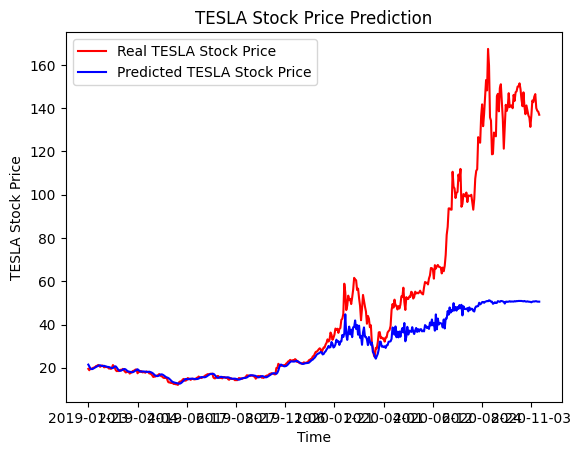

In [9]:
plt.plot(df.loc[800:, 'Date'],data_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()